In [898]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, normaltest

In [899]:
#loading dataset
df = pd.read_csv('house_price.csv')

In [900]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


### Q1. Perform basic EDA

In [901]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [902]:
df.shape

(13200, 7)

In [903]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [904]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [905]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [906]:
#to check duplicates
df.duplicated().sum()

np.int64(1049)

In [907]:
df.drop_duplicates(inplace=True)

In [908]:
df.duplicated().sum()

np.int64(0)

In [909]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

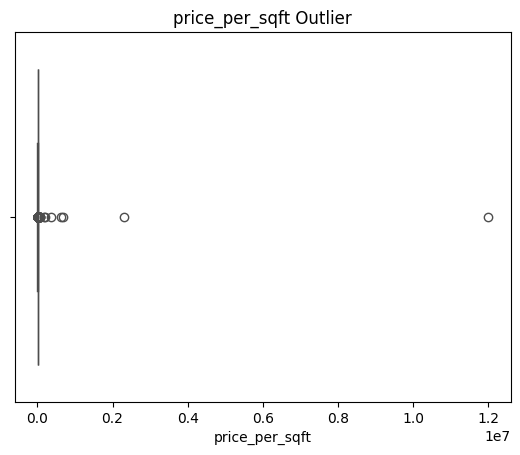

In [910]:
sns.boxplot(x = df['price_per_sqft'],color='red').set_title('price_per_sqft Outlier')
plt.show()

###  Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

####  Mean and Standard deviation

In [911]:
upper_limit = df['price_per_sqft'].mean() + 3*df['price_per_sqft'].std()
lower_limit = df['price_per_sqft'].mean() - 3*df['price_per_sqft'].std()
print('upper limit : ',upper_limit)
print('lower limit : ',lower_limit)

upper limit :  341831.3445273032
lower limit :  -325566.06084694766


In [912]:
# find the outlier
df.loc[(df['price_per_sqft'] >= upper_limit) | (df['price_per_sqft'] <= lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [913]:
# Trimming - delete the outlier data
new_df = df.loc[(df['price_per_sqft'] <= upper_limit) & (df['price_per_sqft'] >= lower_limit)]
print('before removing outliers : ',len(df))
print('after removing outliers : ',len(new_df))

before removing outliers :  12151
after removing outliers :  12146


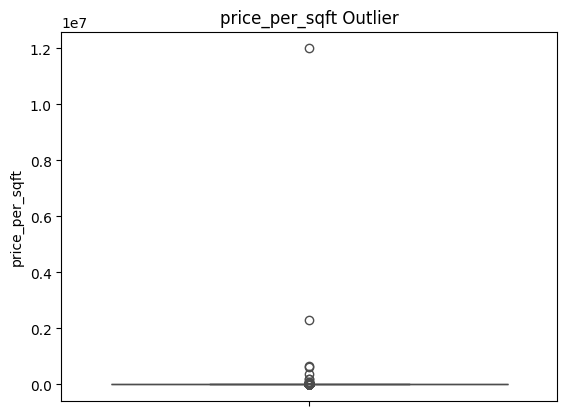

In [914]:
sns.boxplot(data = df['price_per_sqft'],color='blue').set_title('price_per_sqft Outlier')
plt.show()

In [915]:
# capping - change the outlier values to upper or lower limit values
new_df = df.copy()
new_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [916]:
# Ensure the column is float before capping
new_df['price_per_sqft'] = new_df['price_per_sqft'].astype(float)
new_df['price_per_sqft'] = new_df['price_per_sqft'].clip(lower=lower_limit, upper=upper_limit)

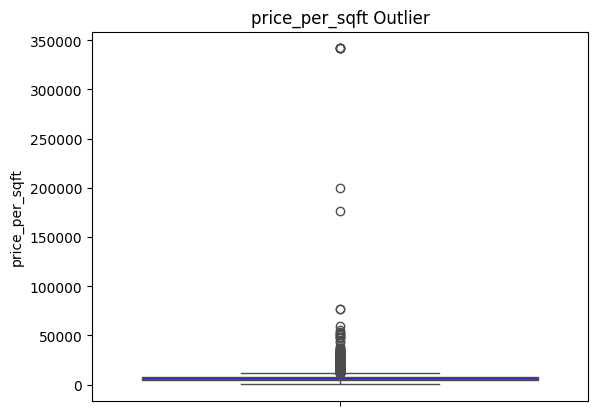

In [917]:
sns.boxplot(data = new_df['price_per_sqft'],color='blue').set_title('price_per_sqft Outlier')
plt.show()

#### Percentile method

In [918]:
upper_limit = df['price_per_sqft'].quantile(0.99)
lower_limit = df['price_per_sqft'].quantile(0.01)
print('upper limit : ',upper_limit)
print('lower limit : ',lower_limit)

upper limit :  24000.0
lower limit :  2532.0


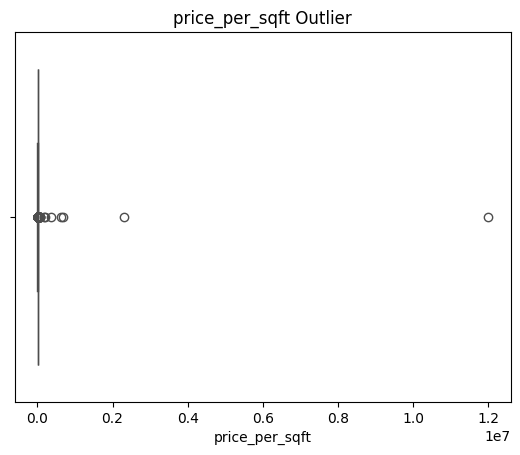

In [919]:
sns.boxplot(x = df['price_per_sqft'],color='red').set_title('price_per_sqft Outlier')
plt.show()

In [920]:
# find the outlier
df.loc[(df['price_per_sqft'] >= upper_limit) | (df['price_per_sqft'] <= lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000


In [921]:
# Trimming - delete the outlier data
new_df = df.loc[(df['price_per_sqft'] <= upper_limit) & (df['price_per_sqft'] >= lower_limit)]
print('before removing outliers : ',len(df))
print('after removing outliers : ',len(new_df))

before removing outliers :  12151
after removing outliers :  11908


In [922]:
# capping - change the outlier values to upper or lower limit values
new_df = df.copy()
new_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [923]:
# Ensure the column is float before capping
new_df['price_per_sqft'] = new_df['price_per_sqft'].astype(float)
new_df['price_per_sqft'] = new_df['price_per_sqft'].clip(lower=lower_limit, upper=upper_limit)

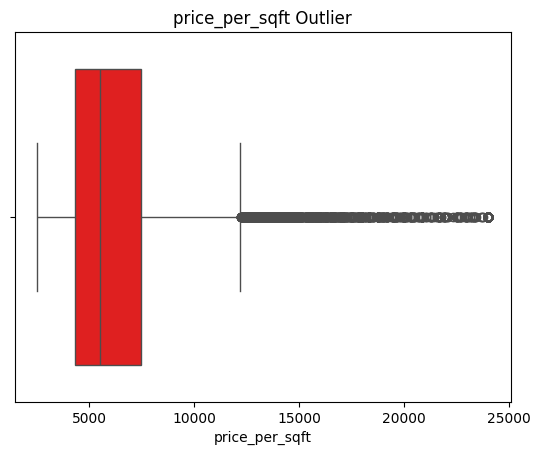

In [924]:
sns.boxplot(x = new_df['price_per_sqft'],color='red').set_title('price_per_sqft Outlier')
plt.show()

#### IQR(Inter quartile range method)

In [925]:
# Treating the Outlier using IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

print('Q1 : ',Q1)
print('Q3 : ',Q3)

Q1 :  4312.0
Q3 :  7461.0


In [926]:
# Calculate the quartiles and IQR for the outlier columns
IQR = Q3 - Q1
print('IQR : ',IQR)

IQR :  3149.0


In [927]:
# Outlier treatment using IQR method (capping at 1.5 times IQR)
outliers_lower = df['price_per_sqft'] < (Q1 - 1.5 * IQR)
outliers_upper = df['price_per_sqft'] > (Q3 + 1.5 * IQR)

In [928]:
outliers = ((df['price_per_sqft']<outliers_lower)|(df['price_per_sqft']>outliers_upper)).sum()

percentage = (outliers/len(df['price_per_sqft']))*100
print('Outlier percentage : ',percentage)

Outlier percentage :  100.0


In [929]:
# find the outlier
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000


In [930]:
# Trimming - delete the outlier data
new_df = df.loc[(df['price_per_sqft'] < upper_limit) & (df['price_per_sqft'] > lower_limit)]
print('before removing outliers : ',len(df))
print('after removing outliers : ',len(new_df))

before removing outliers :  12151
after removing outliers :  11905


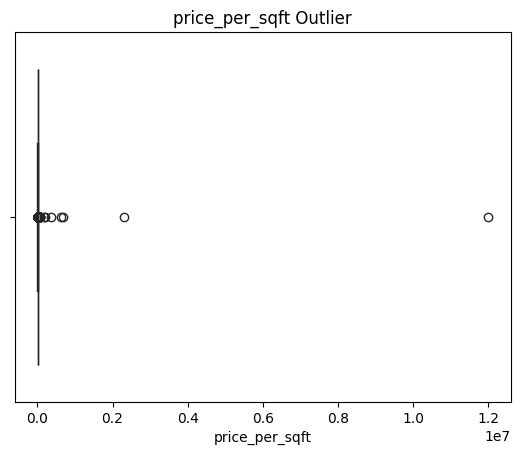

In [931]:
sns.boxplot(x = df['price_per_sqft'],color='green').set_title('price_per_sqft Outlier')
plt.show()

In [932]:
# capping - change the outlier values to upper or lower limit values
new_df = df.copy()
# Ensure the column is float before capping
new_df['price_per_sqft'] = new_df['price_per_sqft'].astype(float)

In [933]:
# Cap the outliers to 1.5 times IQR
new_df['price_per_sqft'] = new_df['price_per_sqft'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

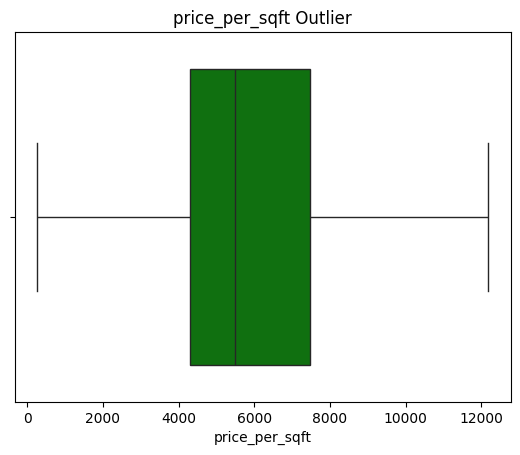

In [934]:
sns.boxplot(x = new_df['price_per_sqft'],color='green').set_title('price_per_sqft Outlier')
plt.show()

####  Z Score method

In [935]:
# Using Z score method for 'price'
price_z_score = zscore(df['price_per_sqft'])

In [936]:
# cap the outliers at +_3 standard deviation
df['price_per_sqft'] = np.where(np.abs(price_z_score)>3, df['price_per_sqft'].mean(),df['price_per_sqft'])

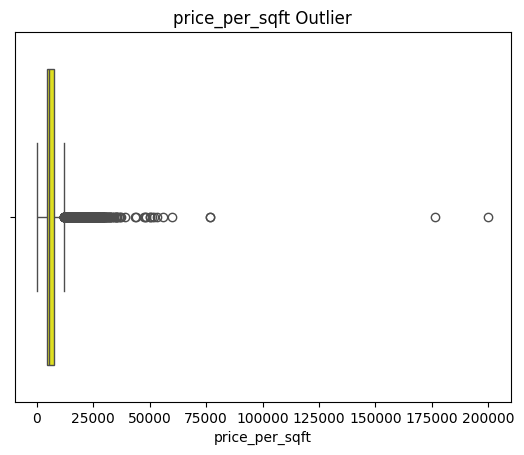

In [937]:
sns.boxplot(x = df['price_per_sqft'],color='yellow').set_title('price_per_sqft Outlier')
plt.show()

In [938]:
# Testing for skewness
print('Skewness before Transformation')
print(df[['price_per_sqft']].apply(skew))

Skewness before Transformation
price_per_sqft    10.522839
dtype: float64


In [939]:
# Applying log transformation to remove skewness
df['price_per_sqft'] = np.log1p(df['price_per_sqft'])

In [940]:
# Testing for skewness after transformation
print('Skewness After Transformation')
print(df[['price_per_sqft']].apply(skew))

Skewness After Transformation
price_per_sqft    0.847572
dtype: float64


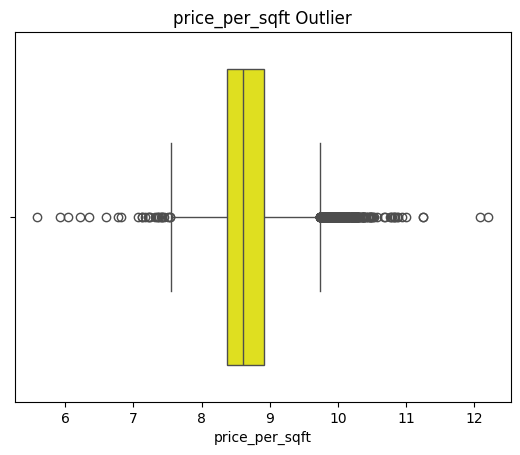

In [941]:
sns.boxplot(x = df['price_per_sqft'],color='yellow').set_title('price_per_sqft Outlier')
plt.show()

#### Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

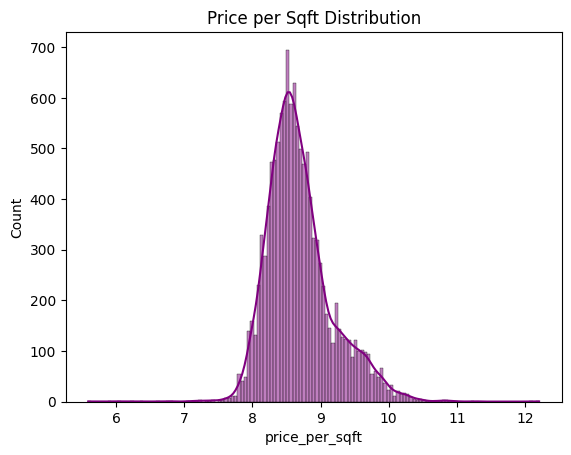

In [942]:
sns.histplot(x=df['price_per_sqft'].dropna(), kde=True, color='purple').set_title('Price per Sqft Distribution')
plt.show()

### Check the correlation between all the numerical columns and plot heatmap.

In [943]:
# Compute the correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,0.108049
bath,0.386694,1.000000,0.448802,0.898875,0.431352
price,0.572516,0.448802,1.000000,0.390008,0.596871
bhk,0.339936,0.898875,0.390008,1.000000,0.410643
price_per_sqft,0.108049,0.431352,0.596871,0.410643,1.000000


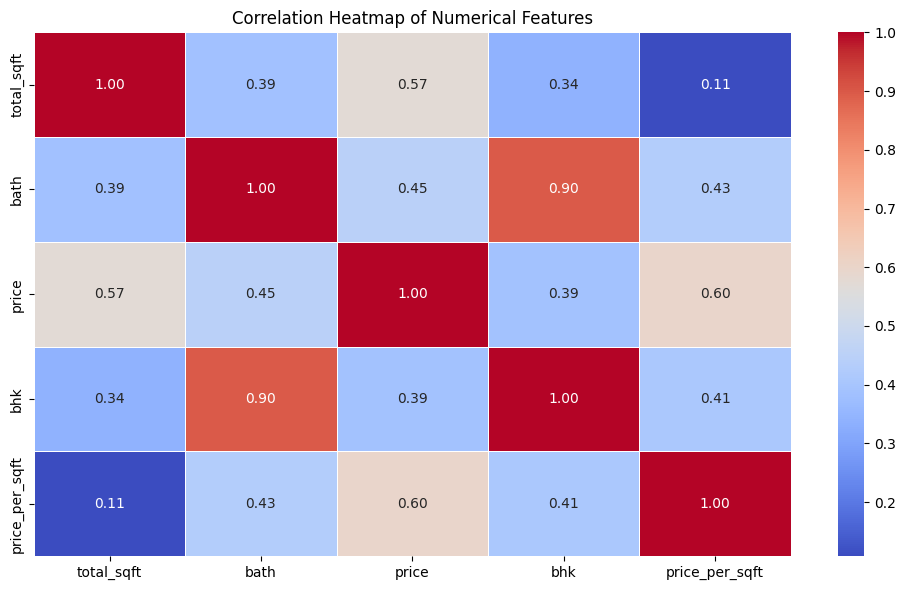

In [944]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [945]:
# Defining pairs of columns to compare
scatter_pairs = [
    ('total_sqft', 'price'),
    ('bath', 'price'),
    ('price_per_sqft', 'price')
]

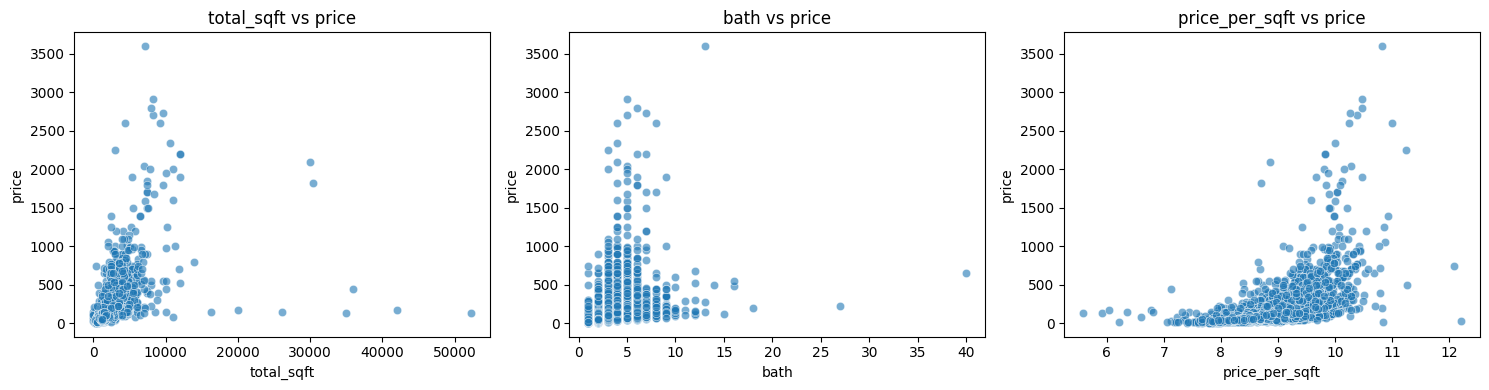

In [946]:
# Plot each scatter plot
plt.figure(figsize=(15, 4))
for index, (x, y) in enumerate(scatter_pairs):
    plt.subplot(1, 3, index + 1)
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    plt.title(f'{x} vs {y}')
plt.tight_layout()
plt.show()